In [125]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)

In [126]:
df = pd.read_csv('input/inputTrain.csv').drop(columns='Unnamed: 0')
df = df[['tradeTime', 'price']]
df['pred_price'] = pd.read_csv('pricePrediction.csv')['Stacking_model'].values
df['price'].apply(lambda x: np.expm1(x))
df['pred_price'].apply(lambda x: np.expm1(x))
date = df['tradeTime'].unique()
date.sort()
df

,tradeTime,price,pred_price
0,0.840336,1.656321,1.707196
1,0.827731,2.125848,2.232424
2,0.802521,0.693147,0.980275
3,0.844538,1.682688,1.747690
4,0.848739,1.931521,2.074259
...,...,...,...
29994,0.701681,0.631272,0.801289
29995,-0.798319,2.230014,2.249368
29996,-0.310924,1.791759,1.766318
29997,-0.130252,3.367296,3.280470


In [127]:
df = df[np.abs(df['price'] - df['pred_price']) / df['price'] < 0.1]

In [128]:
df = df.groupby('tradeTime').mean()
df = df[['price', 'pred_price']]
df['tradeTime'] = date
df

,price,pred_price,tradeTime
tradeTime,,,
-1.445378,2.517209,2.456484,-1.445378
-1.441176,2.411507,2.361105,-1.441176
-1.436975,2.526340,2.496024,-1.436975
-1.432773,2.166886,2.154154,-1.432773
-1.428571,2.650533,2.603517,-1.428571
...,...,...,...
0.962185,2.431693,2.438081,0.962185
0.966387,2.330474,2.328494,0.966387
0.970588,2.525424,2.527649,0.970588


In [129]:
df

,price,pred_price,tradeTime
tradeTime,,,
-1.445378,2.517209,2.456484,-1.445378
-1.441176,2.411507,2.361105,-1.441176
-1.436975,2.526340,2.496024,-1.436975
-1.432773,2.166886,2.154154,-1.432773
-1.428571,2.650533,2.603517,-1.428571
...,...,...,...
0.962185,2.431693,2.438081,0.962185
0.966387,2.330474,2.328494,0.966387
0.970588,2.525424,2.527649,0.970588


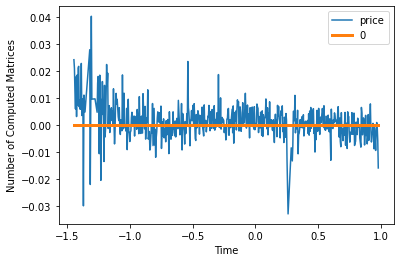

In [130]:
fig, ax = plt.subplots()

ax.plot(df['tradeTime'], (df['price'] - df['pred_price']) / df['price'], label='price')
ax.plot(df['tradeTime'], [0]*len(df), label='0', linewidth=3)
# ax.plot(df['tradeTime'], df['pred_price'], label='pred', linewidth=3)

ax.set_xlabel('Time')
ax.set_ylabel("Number of Computed Matrices")
ax.legend()
plt.show()

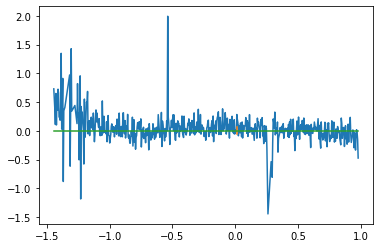

In [131]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(df['tradeTime'], np.expm1(df['price']) - np.expm1(df['pred_price']))
import matplotlib.pyplot as plt

xs = df['tradeTime']
fig, ax = plt.subplots()
# ax.plot(xs, cs(xs))
ax.plot(xs, cs(xs), label='price')
ax.plot([0.0168067226890756]*100, np.arange(-0.06, 0.06, 0.0012))
ax.plot(xs, [0]*len(df), label='price')

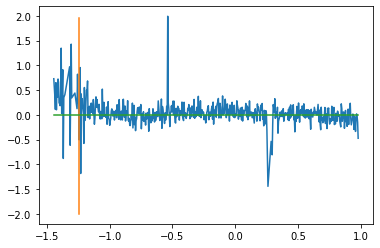

In [132]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(df['tradeTime'], np.expm1(df['price']) - np.expm1(df['pred_price']))
import matplotlib.pyplot as plt

xs = df['tradeTime'].values
fig, ax = plt.subplots()
# ax.plot(xs, cs(xs))
ax.plot(xs, cs(xs), label='price')
ax.plot([xs[30]]*100, np.arange(-2, 2, 0.04))
ax.plot(xs, [0]*len(df), label='price')

In [133]:
xs[30]
# 2.18

-1.2436974789915969